<h1 style = 'background-color:#283270;
             border-style: solid;
             color:#f6f5f5;
             border-color:black;
             font-family:serif'><center><strong><br>Egyptian Endeavour  - Moment of Truth

# Statement
As the world moves forward with the challenging of the Coronavirus.<br>
**Egypt Governoment** has realized the huge gap between their universities education and the world market demand.<br>
Especially in data science and programming domains. <br>
<br>
<br>
Many initiatives had been taken by the **Egyptian government** in the past two years to conquer this gap.<br>
Such as :
* [FWD initiative](https://egfwd.com/)
* [MAHARA TECH initiative](https://maharatech.gov.eg/)
* and others..

# Notebook Objective

**We are here to use kaggle survey datasets to measure the success of the Egyptian Endeavour** 

# Focus Group
The Egyptian participants ( with less than 3 years experince in coding )<br>
As I consider they were the most impacted by at least one of the **Egyptian government initiations**

# Approach

* First we will compare the number of Egyptian participants in kaggle survey in the past three years 2019  , 2020 and 2021 **as an indication of the total Egyptian kaggle users**.
* We will focus in the rest of the analysis on the participants who have less than three years of coding experience as they were the most impacted by the recent  Egyptian initiatives.

# Content Outlines

<ul>
    <li>(Q1) Investigating the number of Egyptian participants.</li>
    <li>(Q2) Investigating the level of experience of the Egyptian participants.</li>
    <li>(Q3) Investigating the chartaristics and background of the Egyptain Juniors</li>
    <li>(Q4)What can we offer to our employers</li>
    </ul>

# Implementation

## Setting up and importing the libraries and reading the datasets

In [1]:
#Import the basic liberaries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #visulaization
import seaborn as sns #visulaization


#visualization style
plt.style.use('seaborn-poster') #set the visualization style
#Set the Box prop for the text
box = {'facecolor':'#f6f5f5',
       'edgecolor':'black', 
       'boxstyle':'round', 
       'linewidth':0.4}
#Set the annotation text props
text_prop = {'ha':'center',
            'va':'center',
            'fontsize': 14,
            'fontweight': 'bold',
            'fontfamily':'serif',
            'bbox': box}
#Set the annotation title props 
title_prop = {'ha':'center',
            'va':'center',
            'fontsize': 20,
            'fontweight': 'bold',
            'fontfamily':'serif',
            'bbox': box}
#set the Bar charts colors
color = ['#283270' , 'lightgray' , 'lightgray']

#shut down warning
import warnings
warnings.filterwarnings('ignore')



#reading the data for the past three years
df_2019 = pd.read_csv('/kaggle/input/kaggle-survey-2019/multiple_choice_responses.csv')
df_2020 = pd.read_csv('/kaggle/input/kaggle-survey-2020/kaggle_survey_2020_responses.csv')
df_2021 = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')


#All done
print('We are ready to go')

We are ready to go


## (Q1) Comparing the number of Egyptian participants in kaggle survey in the past three years 2019  , 2020 and 2021 

,survey year,Number_of_Egyptian_participants
0,Survey 2021,482
1,Survey 2020,179
2,Survey 2019,122


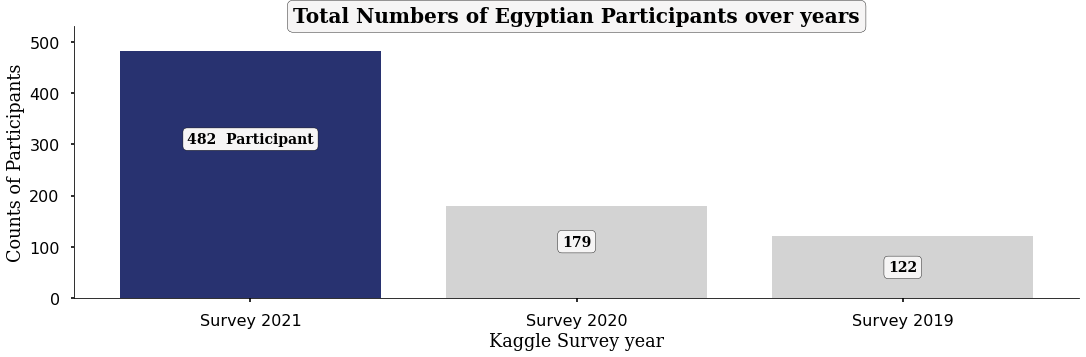

In [2]:
#Calculate the numbers of Egyptian Participants
number_egypt_2019 = df_2019[df_2019.Q3 =='Egypt'].shape[0]
number_egypt_2020 = df_2020[df_2020.Q3 =='Egypt'].shape[0]
number_egypt_2021 = df_2021[df_2021.Q3 =='Egypt'].shape[0]


#Build a dataframe
num_egypt_dict = {'survey year': [ 'Survey 2021' , 'Survey 2020' , 'Survey 2019'] , 
                  'Number_of_Egyptian_participants':[ number_egypt_2021 , number_egypt_2020 , number_egypt_2019]}
num_egypt_df  = pd.DataFrame(num_egypt_dict)


#Display the dataframe
display (num_egypt_df.style.background_gradient())




#Plot the bar plot
fig , ax  = plt.subplots(figsize = (18 , 5 ))
ax.bar(num_egypt_df['survey year'] , 
       num_egypt_df['Number_of_Egyptian_participants']  ,
       color = color )


#ax settings
ax.set_xlabel('Kaggle Survey year' , fontfamily='serif' )
ax.set_ylabel('Counts of Participants' , fontfamily='serif')
ax.set_title('Total Numbers of Egyptian Participants over years' , title_prop)
ax.set_ylim(0 , 530)

#Remove spines
for s in ["top","right"]:
    ax.spines[s].set_visible(False)
    

    
#Annotate texts
ax.text(0, 310, '482  Participant', text_prop)
ax.text(1, 110, '179', text_prop)
ax.text(2, 60, '122', text_prop)

plt.show()

Number of Egyptian participants increases tremendously in an annual basis<br>
if we calculate only the **increasing percentage** from 2020 to 2021 it will be around 170%<br>
>I am intersted to compare the annualy increasing percentage in participants numbers of Egypt to the rest of world

### (Q1-2) Investigate the increasing percentage in number of Egyptian participants to the rest of world from 2020 to 2021

,Number_of_participants_in_2021,Number_of_participants_in_2020,Increasing_percentage_%
Countries,,,
Egypt,482,179,169
Bangladesh,317,143,121
Ghana,99,52,90
South Korea,359,190,88
Viet Nam,277,147,88
United Arab Emirates,111,59,88
Pakistan,530,283,87
China,814,474,71
Kenya,248,153,62


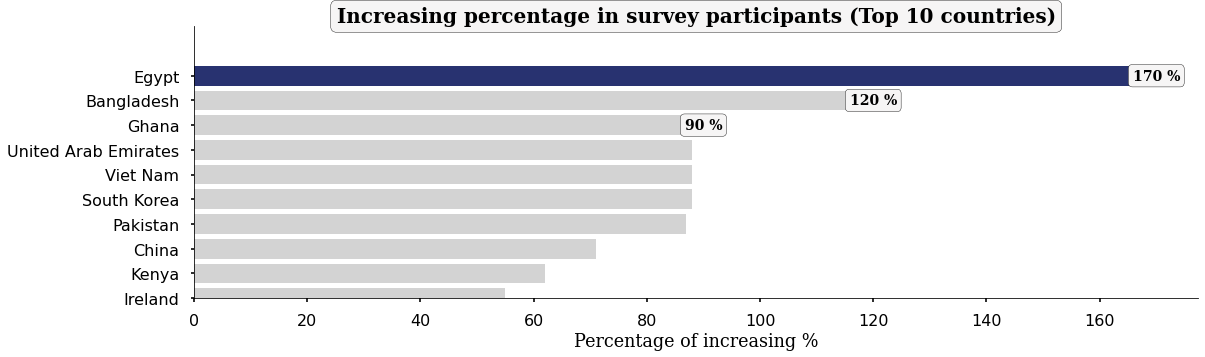

In [3]:
#create and combine the dataframe
countries_2020 = df_2020.groupby('Q3').size().reset_index().rename(columns = 
                                                                   {'Q3':'Countries' , 
                                                                    0:"Number_of_participants_in_2020"}
                                                                  )
countries_2021 = df_2021.groupby('Q3').size().reset_index().rename(columns = 
                                                                   {'Q3':'Countries' , 
                                                                    0:"Number_of_participants_in_2021"}
                                                                  )
countries_df = countries_2021.set_index('Countries').join(countries_2020.set_index('Countries'))
countries_df.dropna(inplace = True)


#Calculate the increasing percentage
countries_df['Increasing_percentage_%'] = (((countries_df.Number_of_participants_in_2021 - 
                                             countries_df.Number_of_participants_in_2020)/
                                            countries_df.Number_of_participants_in_2020)*
                                           100)
#sort the dataframe
countries_df.sort_values(by = 'Increasing_percentage_%'  , 
                         inplace = True , 
                         ascending = False)
#convert to int
countries_df.Number_of_participants_in_2020 =countries_df.Number_of_participants_in_2020.apply(np.int64)
countries_df['Increasing_percentage_%'] =countries_df['Increasing_percentage_%'].apply(np.int64)

#here is the top 10 countries
top_10_contries = countries_df.iloc[:10]
display (top_10_contries.style.background_gradient(subset=['Increasing_percentage_%']))



top_10_contries.sort_values(by ='Increasing_percentage_%' ,
                            inplace = True)
#Create the figure
fig , ax = plt.subplots(figsize = (18 , 5))
#set the parameters
colorh = ['lightgray' ,'lightgray' ,'lightgray' ,
          'lightgray' ,'lightgray' ,'lightgray' ,
          'lightgray' , 'lightgray', 'lightgray' ,
          '#283270']

ax.barh( top_10_contries.index  ,
        top_10_contries['Increasing_percentage_%'] ,
        color = colorh )


#ax setting
ax.set_xlabel('Percentage of increasing %' , 
              fontfamily='serif' )
ax.set_title('Increasing percentage in survey participants (Top 10 countries)' , 
             title_prop)

ax.set_ylim(0,11)

#remove spines
for s in ["top","right"]:
    ax.spines[s].set_visible(False)
    
#Add Text    
ax.text(170,  9 ,'170 %', text_prop)
ax.text(120, 8 ,  '120 %', text_prop)
ax.text(90,  7 ,  '90 %', text_prop)


plt.show()

The nearst country to Egypt in this indecator will be :
* Banglades with increasing **percentage 120 %**
* Ghana with increasing **percentage 90 %**

but still none of the countries included in the survey come even near to the Egypt percentage.

### (Q1-3) visualizing Egypt annualy upranking in the number of paricipants among the rest of the world

,Survey_Year,Egypt_Rank
0,Survey 2019,30
1,Survey 2020,21
2,Survey 2021,10


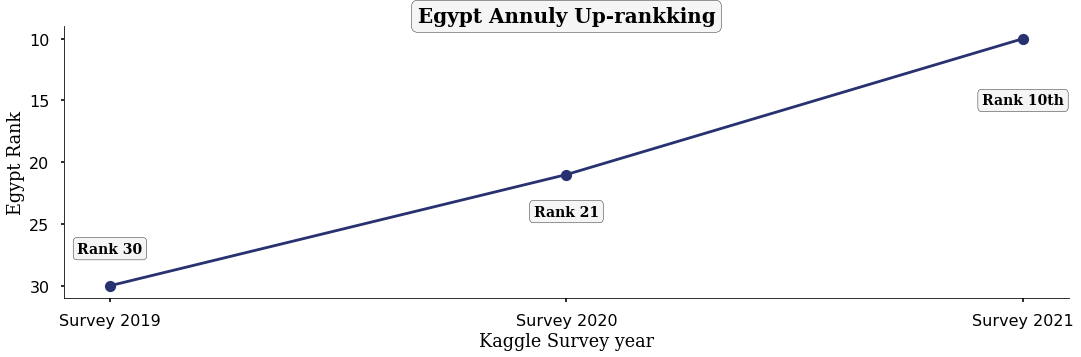

In [4]:
#Remove the first row
df_2019c = df_2019.iloc[1:]
df_2020c = df_2020.iloc[1:]
df_2021c = df_2021.iloc[1:]

#count the number of participants
df_2021c = df_2021c.Q3.value_counts().sort_values(ascending = False).reset_index()
df_2020c = df_2020c.Q3.value_counts().sort_values(ascending = False).reset_index()
df_2019c = df_2019c.Q3.value_counts().sort_values(ascending = False).reset_index()

#Get the Rank
Egypt_rank_2021  = df_2021c[df_2021c['index'] == 'Egypt'].index.values.astype(int)[0]
Egypt_rank_2020  = df_2020c[df_2020c['index'] == 'Egypt'].index.values.astype(int)[0]
Egypt_rank_2019  = df_2019c[df_2019c['index'] == 'Egypt'].index.values.astype(int)[0]

#Build a dataframe
rank_egypt_dict = {'Survey_Year': [  'Survey 2019' , 'Survey 2020' , 'Survey 2021'] , 
                  'Egypt_Rank':[ Egypt_rank_2019 , Egypt_rank_2020  , Egypt_rank_2021]}
rank_egypt_df  = pd.DataFrame(rank_egypt_dict)



#Display the dataframe
display (rank_egypt_df)




#Plot the bar plot
fig , ax  = plt.subplots(figsize = (18 , 5 ))
ax.plot(rank_egypt_df['Survey_Year'] , 
       rank_egypt_df['Egypt_Rank']  ,
        marker  = 'o',
       color = '#283270')


#ax settings
ax.set_xlabel('Kaggle Survey year' , fontfamily='serif' )
ax.set_ylabel('Egypt Rank' , fontfamily='serif')
ax.set_title('Egypt Annuly Up-rankking' , title_prop)
#ax.set_ylim(0 , 530)

#Remove spines
for s in ["top","right"]:
    ax.spines[s].set_visible(False)

ax.invert_yaxis();

 
#Annotate texts
ax.text(2, 15, 'Rank 10th', text_prop)
ax.text(1, 24, 'Rank 21', text_prop)
ax.text(0, 27, 'Rank 30', text_prop)

plt.show()

We can obviously notice how Egypt **uprank** in an annualy basis:
* At 2019 : Egypt ranked in the **30th** place with total number of participants 122.
* At 2020 : Egypt ranked in the **21th** place with total number of participants 179.
* At 2021 : Egypt ranked in the **10th** place with total number of participants 482.

I will assume that all the Egyptain who got the most binifit from the latest initiations has experince less than 3 years of coding<br>
Fortunately Qustion number 6 in the survey _For how many years have you been writing code and/or programming?_ <br>could give us a clue to continue our analysis<br>
>for the rest of the analysis we will mark all participants with less than 3 years of experince and label them as Juniors<br>
>the next question would be <br><strong>out of the 482 Egyptian participants in 2021 survey , How many of them we could mark them as Juniors?</strong>

In [5]:

#-------------------------------------------------------------------------------------#
# In this cell I will change the long str varibales to short for better visualization #
# I will Also change the bins of the Question Answers a littel bit to serve my story  #
# For Example the Age band I only care how many people over 30                        #
#_____________________________________________________________________________________#


#Load the kaggle survey data for 2021
df_2021 = pd.read_csv('/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv')


#subset the data frame for country Egypt
Egypt_2021 = df_2021[df_2021.Q3=='Egypt']


# Create Experince_level column.
# Junior : from 0 to 3 years coding experince.
# Senior : from 3 to 10 years coding experince.
# Master : more than 10 years experince in coding.
Egypt_2021['Experince_level'] = Egypt_2021['Q6']
Egypt_2021['Experince_level'] = Egypt_2021['Experince_level'].apply(lambda x: 'Junior'  if x == 'I have never written code' else x)
Egypt_2021['Experince_level'] = Egypt_2021['Experince_level'].apply(lambda x: 'Junior'  if x == '< 1 years' else x)
Egypt_2021['Experince_level'] = Egypt_2021['Experince_level'].apply(lambda x: 'Junior'  if x == '1-3 years' else x)
Egypt_2021['Experince_level'] = Egypt_2021['Experince_level'].apply(lambda x: 'Senior' if x == '3-5 years' else x)
Egypt_2021['Experince_level'] = Egypt_2021['Experince_level'].apply(lambda x: 'Senior' if x == '5-10 years' else x)
Egypt_2021['Experince_level'] = Egypt_2021['Experince_level'].apply(lambda x: 'Master' if x == '10-20 years' else x)
Egypt_2021['Experince_level'] = Egypt_2021['Experince_level'].apply(lambda x: 'Master' if x == '20+ years' else x)



# Change the long answers in the degree column for better visualization.
Egypt_2021.Q4 = Egypt_2021.Q4.apply(lambda x:'High School' if x == 'No formal education past high school' else x)
Egypt_2021.Q4 = Egypt_2021.Q4.apply(lambda x:'Still in College' if x == 'Some college/university study without earning a bachelor’s degree' else x)



# Change the answers in are you using ML in your work to be yes or no for the analysis purpos.
Egypt_2021.Q23 = Egypt_2021.Q23.apply(lambda x: 'Yes' if x == 'We have well established ML methods (i.e., models in production for more than 2 years)' else x)
Egypt_2021.Q23 = Egypt_2021.Q23.apply(lambda x: 'Yes' if x == 'We recently started using ML methods (i.e., models in production for less than 2 years)' else x)
Egypt_2021.Q23 = Egypt_2021.Q23.apply(lambda x: 'Yes' if x == 'We use ML methods for generating insights (but do not put working models into production)' else x)
Egypt_2021.Q23 = Egypt_2021.Q23.apply(lambda x: 'No' if x == 'No (we do not use ML methods)' else x)
Egypt_2021.Q23 = Egypt_2021.Q23.apply(lambda x: 'No' if x == 'I do not know' else x)
Egypt_2021.Q23 = Egypt_2021.Q23.apply(lambda x: 'No' if x == 'We are exploring ML methods (and may one day put a model into production)' else x)



#change the age band in the Q1.
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='30-34' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='30-34' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='35-39' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='40-44' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='45-49' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='50-54' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='55-59' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='60-69' else x)
Egypt_2021.Q1 = Egypt_2021.Q1.apply(lambda x: 'Older Than 30 Years' if x =='70+' else x)




#-------------------------------------------------------------------------------#
#                                  We are Good to Go                            #
#_______________________________________________________________________________#

## (Q2) Invistigate the level of experience of the Egyptian participants in Kaggle 2021 survey.

For the purpose of my analysis I will use Qustion number 6 in the survey _For how many years have you been writing code and/or programming?_ with a littel modifications as follow:

>Junior : Who have less than 3 years ecperince in coding.<br>
>Senior : From 5 to 10 years ecperince in coding.<br>
>Master : Who have more than 10 years ecperince in coding.<br>

**Now Let's count the numbers**


,Experince_level,Number_of_Egyptian_participants
0,Junior,354
1,Senior,100
2,Master,28


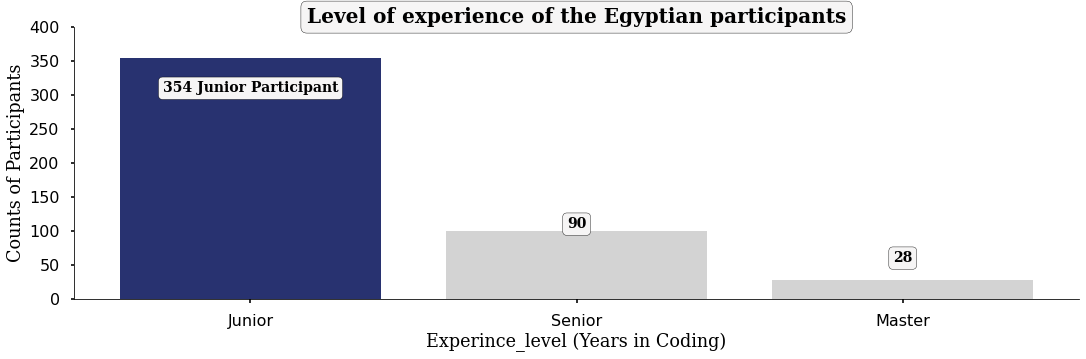

In [6]:
ex_level_count = Egypt_2021.Experince_level.value_counts().reset_index().rename(columns = {'index':'Experince_level' , 'Experince_level': 'Number_of_Egyptian_participants'})
display (ex_level_count.style.background_gradient())

fig , ax  = plt.subplots(figsize = (18 , 5 ))
ax.bar(ex_level_count.Experince_level , ex_level_count.Number_of_Egyptian_participants  , color = color )
ax.set_xlabel('Experince_level (Years in Coding)' , fontfamily='serif' )
ax.set_ylabel('Counts of Participants' , fontfamily='serif')
ax.set_title('Level of experience of the Egyptian participants' , title_prop)
ax.set_ylim(0 , 400)
for s in ["top","right"]:
    ax.spines[s].set_visible(False)
ax.text(0, 310, '354 Junior Participant', text_prop)
ax.text(1, 110, '90', text_prop)
ax.text(2, 60, '28', text_prop)

plt.show()

354 Egyptian participants out of 482 have less than three years of Coding experince.<br>
Most of them was directly impacted with one or more of the current intitations in Egypt<br>
But still the question exist **Who are thoose Juniors , What are thier ages , Whats are thier education background !!**<br>
>Let's Dig Deep 


## (Q3) Invistigate the chartaristics and background of the Egyptain who got the most binifits from the Egyption initiations

To answer this research question we will re-shape the survey dataset<br>
Using the following helper function we will create a data frame shows the three experince level in columns and indexing with the other variables<br>
like Age band , Education background  , etc...

In [7]:

#--------------------------------------------------------------------------------------------------------#
#                                        Helper Functions                                                #
#________________________________________________________________________________________________________#


def varibale_experince_level_df (df , Qx , new_df = None):
    """
    Define a Function to create a data frame showing deffrinet variables accross the Experince level 
    imput
    df : pandas dataframe
    Qx : str ,  column name of the required varibale
    new_df : a place holder for the new generated data frame
    return
    new_df : new pandas dataframe
    """
    Egypt_Jonuirs = df[df.Experince_level == 'Junior'][Qx].reset_index().groupby(Qx)['index'].count().reset_index()
    Egypt_Jonuirs.rename(columns ={'index':'Juniors'} , inplace = True)

    Egypt_Seniors = df[df.Experince_level == 'Senior'][Qx].reset_index().groupby(Qx)['index'].count().reset_index()
    Egypt_Seniors.rename(columns ={'index':'Seniors'} , inplace = True)

    Egypt_Master = df[df.Experince_level == 'Master'][Qx].reset_index().groupby(Qx)['index'].count().reset_index()
    Egypt_Master.rename(columns ={'index':'Masters'} , inplace = True)
    
    new_df = Egypt_Jonuirs.set_index(Qx).join(Egypt_Seniors.set_index(Qx))
    new_df = new_df.join(Egypt_Master.set_index(Qx))
    
    return (new_df)




def variable_experince_level_stacked_bars (df , title):
    """
    Define a function to plot a stacked bar chart for the experince levels accross diffrent variables
    input
    df    : pandas dataframe
    title : str  , tiltle of the chart
    return 
    matplotlib stacked bar chart
    """
    fig , ax = plt.subplots(figsize = (18 , 5 ))
    ax.bar(df.index  , df.Juniors , label   ='Juniors' , color = '#283270')
    ax.bar(df.index  , df.Seniors ,bottom  = df.Juniors ,  label   ='Seniors' , color = 'darkgray')
    ax.bar(df.index  , df.Masters ,bottom  = df.Juniors+ df.Seniors ,  label   ='Masters' , color = '#323236')
    ax.set_title (title , title_prop)
    ax.set_xticklabels(df.index , rotation  = 45)
    for s in ["top","right"]:
        ax.spines[s].set_visible(False)
    plt.legend()
    return fig , ax

print ('Helper functions are ready to use')
    
#--------------------------------------------------------------------------------------------------------#
#                                        We are Good to Go                                               #
#________________________________________________________________________________________________________#

Helper functions are ready to use


### (Q3-2) How old are the Egyptian Juniors ?

,Juniors,Seniors,Masters
Age Band,,,
18-21,114,8,NaN
22-24,95,34,NaN
25-29,50,32,NaN
Older Than 30 Years,95,26,28.0


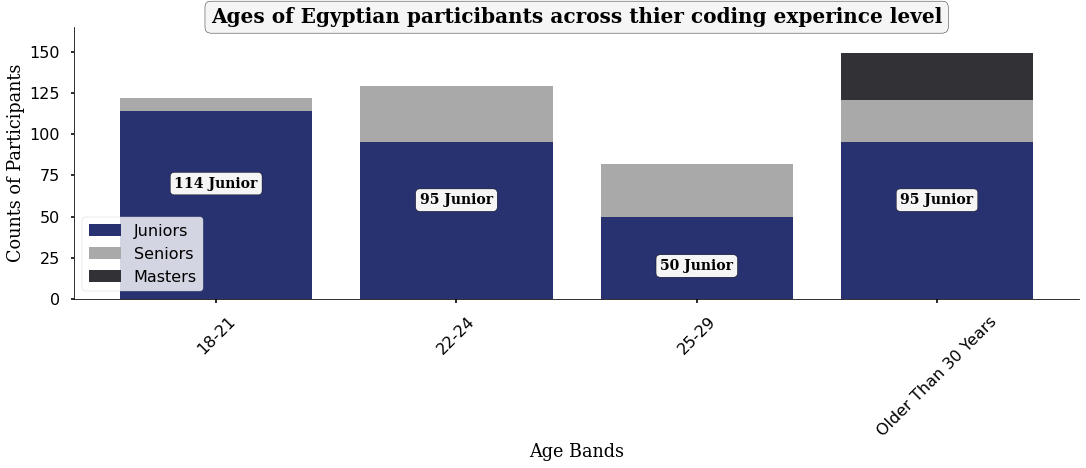

In [8]:
#Create and Display the data frame
ages_experince_level = varibale_experince_level_df (Egypt_2021 , 'Q1' , new_df = None)
ages_experince_level.index.names = ['Age Band']
display (ages_experince_level)

#Plot the figure
fig , ax = variable_experince_level_stacked_bars (ages_experince_level , 'Ages of Egyptian particibants across thier coding experince level')
ax.set_xlabel('Age Bands' , fontfamily='serif' )
ax.set_ylabel('Counts of Participants' , fontfamily='serif')
ax.text(3, 60, '95 Junior', text_prop)
ax.text(2, 20, '50 Junior', text_prop)
ax.text(1, 60, '95 Junior', text_prop)
ax.text(0, 70, '114 Junior', text_prop)
ax.set_ylim(0,165)

plt.show()

Did you notice how many particibants older than 30 years old and have only less than 3 years of coding experince ! <br>

><strong> A personal experience</strong><br> Iam one of them with my 35 years old I started my career as a civil engineer with more than 12 years experince in construction  and I just found my Passion in data from just seven months ago <br>


### (Q3-3) What is the education Level of my group (The Juniors) who started coding in less than 3 years ago?

,Juniors,Seniors,Masters
Education Degree,,,
Bachelor’s degree,232,53,7.0
Doctoral degree,11,10,10.0
High School,7,2,NaN
I prefer not to answer,9,2,NaN
Master’s degree,42,27,9.0
Still in College,53,5,NaN


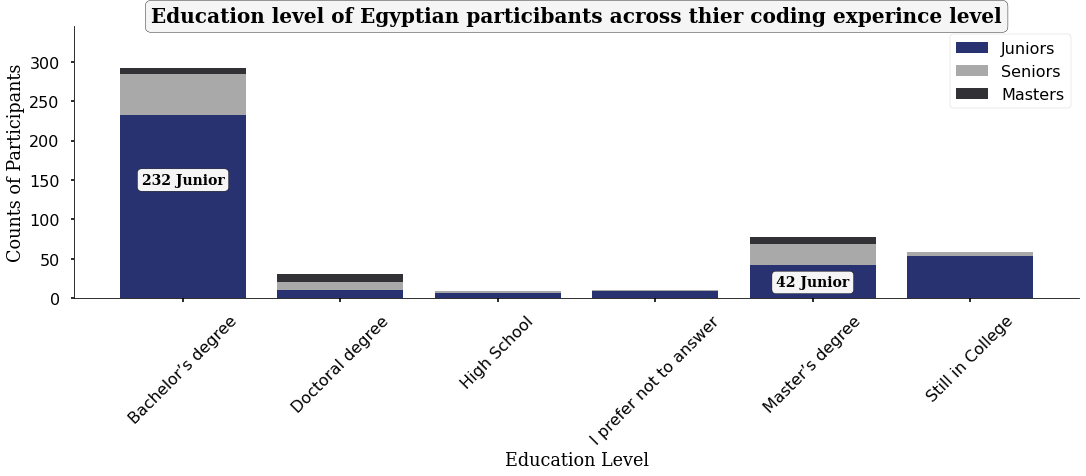

In [9]:
Degree_experince_level = varibale_experince_level_df (Egypt_2021 , 'Q4' , new_df = None)
Degree_experince_level.index.names = ['Education Degree']
display (Degree_experince_level)
fig , ax = variable_experince_level_stacked_bars (Degree_experince_level , 'Education level of Egyptian particibants across thier coding experince level')
ax.set_ylim(0,345)
ax.set_xlabel('Education Level' , fontfamily='serif' )
ax.set_ylabel('Counts of Participants' , fontfamily='serif')
ax.text(0, 150, '232 Junior', text_prop)
ax.text(4, 20, '42 Junior', text_prop)
plt.show()

Most of us (Holding a Bachelor's degree ) and even thier are some other Egyptian hold a Master's or a Doctral degree and just start coding in the past very few years
<p style = 'color:red'>
that's very intersting to see high level educated persons just decide to **shift thier old carrer** and jump out from thier comfort zone. <br>
</p>
But do you think parctice coding and prctice thier newely gained skills in thier full time jop.!

furtunally one of the questions in the survey ask the participants of thier emplyers use ML in thier work or not <br>
Let's figuer it out

### (Q3-4) Did the Egyptian incorporate machine learning methods in their full time work?

If we look in the survey question number 23<br>
_Does your current employer incorporate machine learning methods into their business?_<br>
we can get a hint if Egyptian emplyers know the importancy of the data science or still working in the 90th of the past century

,Juniors,Seniors,Masters
Q23,,,
No,157,48,21
Yes,45,23,3


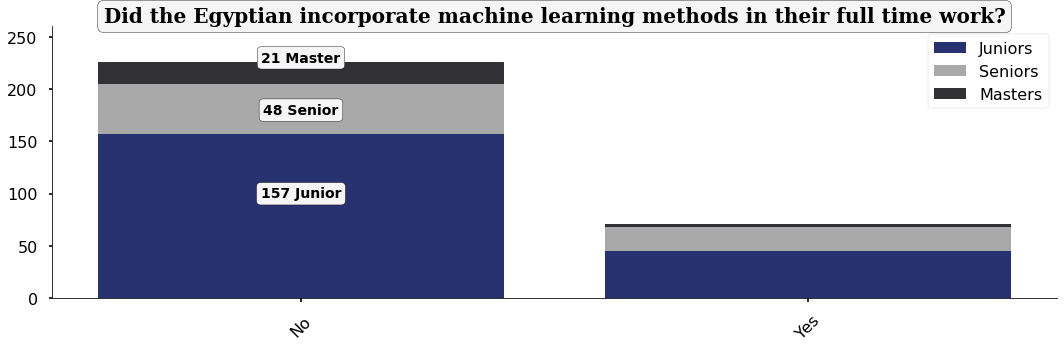

In [10]:
ML_experince_level = varibale_experince_level_df (Egypt_2021 , 'Q23' , new_df = None)
display (ML_experince_level)
fig , ax = variable_experince_level_stacked_bars (ML_experince_level , 'Did the Egyptian incorporate machine learning methods in their full time work?')
ax.set_ylim(0,260)
ax.text(0, 100, '157 Junior', ha='center', va='center', fontsize=14, fontweight='bold',bbox=box)
ax.text(0, 180, '48 Senior', ha='center', va='center', fontsize=14, fontweight='bold',bbox=box)
ax.text(0, 230, '21 Master', ha='center', va='center', fontsize=14, fontweight='bold',bbox=box)
plt.show()

I think that's the most important chart in my Analysis<br>
Did you notice how the egyptian employers waste thier employees skills and abalities<br>
<p style = 'color :red'>
A 21 participants with experience over 10 years in coding and still working in firms that did't recognize the importancy of the data science yet</p>


## (Q4) What can we offer to our employees

,Juniors,Seniors,Masters
What we can do,,,
Data Analyst,70,15.0,2.0
Data Scientist,54,13.0,2.0
Machine Learning Engineer,33,17.0,NaN
Software Engineer,16,10.0,3.0
Business Analyst,10,3.0,1.0
Research Scientist,9,9.0,8.0
Data Engineer,6,4.0,1.0
Statistician,3,NaN,NaN
Product Manager,2,NaN,1.0


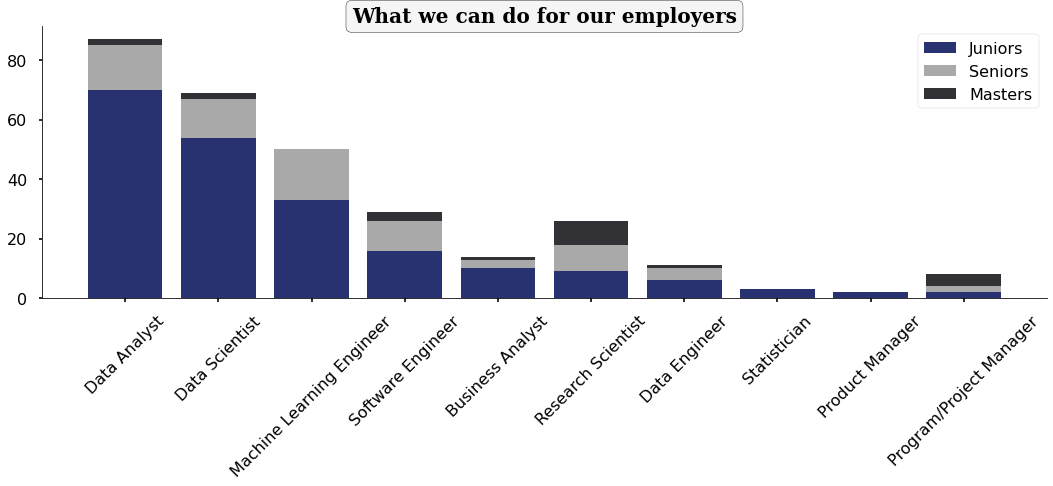

In [11]:
Role_experince_level = varibale_experince_level_df (Egypt_2021 , 'Q5' , new_df = None)
Role_experince_level.drop(index=['Student' , 'Currently not employed' ,'Developer Relations/Advocacy' ,  'Other' ]  , inplace = True )
Role_experince_level.sort_values(by = 'Juniors' , inplace = True , ascending =  False)
Role_experince_level.index.names = ['What we can do']
display (Role_experince_level)
fig , ax = variable_experince_level_stacked_bars (Role_experince_level , 'What we can do for our employers')
plt.show()

We are data analysts , data scientists , machine learning engineer and more<br>
Equipped with the required tools and skills and ready to unleash our power

# Take away

Egypt government initiations had a great impact to conquer this gap between the skills of thier youth and the The rapid technological development. <br>
A huge step to the future was taken.<br>
But still thier are more to do to change the culture and the mindset of the employers.<br>
I deeply believe in the capabilities of the Egyptian youth who can shape the future.<br>
<p style ='color:red'>
Egyptian Corporate Top Management : We are here and ready , wake up and let's do it together.</p>

<h1 style = 'background-color:#283270;
             border-style: solid;
             color:#f6f5f5;
             border-color:black;
             font-family:serif'><center><strong><br>Thank you for visiting my notebook